<div style="text-align: center;">
    <h1 style="color:black;" > ANEMIA EN NIÑOS ENTRE 6 Y 36 MESES EN EL PERÚ <a id="indice"></a> </h1>
</div>

<h1 style="color:black;" > Importación de librerías <a id="1"></a> </h1>

Se importan las librerías necesarias:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
!pip install squarify
import squarify

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style="color:black;" > 1. Extracción de datos <a id="3"></a> </h1>

Accedemos y leemos el archivo que contiene el conjunto de datos limpio:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Proyecto/datos_limpios.csv')

In [ ]:
df.head()

,n_personas_hogar,n_niños_menores_cinco,área_residencia,lugar_residencia,fuente_agua_para_beber,piso_vivienda,índice_riqueza,puntuación_índice_riqueza,seguro_salud_essalud/ipss,seguro_salud_militar,seguro_salud_integral,seguro_salud_compañía_seguros,seguro_salud_seguro_privado,seguro_salud_no_tiene,n_meses_lactancia,lugar_parto,tamaño_niño_al_nacer,n_veces_comida_sólida_semisólida_día_anterior,niño_afiliado_sis,durante_embarazo_diagnóstico_anemia,diarrea_últimas_dos_semanas,fiebre_últimas_dos_semanas,tos_últimas_dos_semanas,suplemento_vitamina_a_reciente,antiparasitarios_últimos_seis_meses,peso_kg,talla_cm,nivel_hemoglobina_ajustada_g/dl,nivel_anemia,hierro_jarabe_última_semana,hierro_polvo_micronutrientes_última_semana,hierro_gotas_última_semana,hierro_otro_última_semana,edad_meses,sexo_niños,nivel_educativo_madre,n_orden_nacimiento,b_té_café,b_leche_materna_refrigerada_conservada,b_leche_polvo_nam_s26_similac,b_otra_leche_fresca_evaporada_polvo,f_naranjas_mandarina_lima_maracuyá_toronja,f_secas,harina_pan_fideos_galletas_otra_comida_con_cereales,papa_yuca_olluco_oca_mashua,huevos,res_pollo_pescado_mariscos_otrascarnes_hígado_mondongo_otrasvísceras,v_camote_zanahorias_zapallo,v_hoja_verdeoscuro_espinaca_acelga_otros,f_mango_papaya_aguaje_otrasfrutas_vitamina_a,f_plátano_isla_seda_maduro_manzana_palta_otras,habas_frijol_lenteja_soya_pallares_garbanzo_arvejas,queso_yogurt_otros_lácteos,comida_hecha_aceite_grasas_mantequilla,nivel_educativo_esposo_compañero_merge5,actualmente_trabajando,nivel_educativo_esposo_compañero_2,violencia_emocional,violencia_física_menos_severa,violencia_física_severa,violencia_sexual,edad_madre,imc_madre,actualmente_embarazada,nivel_hemoglobina_ajustada_g/dl_madre,nivel_anemia_madre,región_natural,n_veces_lavado_manos,lavado_manos_después_baño,lavado_manos_después_pañales,lavado_manos_antes_preparar_comida,lavado_manos_antes_alimentar_niño,persona_alimenta_niño,nivel_educativo_esposo_compañero_REC91_22,preparación_alimentos_minsa_último_año,n_veces_preparación_alimentos_minsa_último_año,visita_minsa_alimentación_último_año,n_veces_visita_minsa_alimentación_último_año,seguro_salud_público,seguro_salud_privado,amamantamiento,amamantamiento2,pobreza,fuente_agua,material_piso,tamaño_hogar,menores_cinco_años,edad_niño,edad_niño2,orden_nacimiento,orden_nacimiento2,edad_madre2,edad_madre3,parto_institución_salud,consumo_leche,productos_lácteos,frutas,diversidad_dietética,diversidad_dietética2,hierro_última_semana,anemia
0,3.0,1.0,1.0,1.0,11,33,5,1.469055,0.0,1.0,0.0,0.0,0.0,0.0,12.0,31.0,2.0,4,0.0,2,0,0,2,0,1,15.8,94.1,11.6,4,2,2,2,2,31.0,1.0,3.0,1.0,1,0,1,0,1,0,1,1,1,1,0,0,1,1,1,0,1,3,0.0,5,0,0,0,0,22.0,2636.0,0.0,12.3,4.0,3.0,4,1,0,1,1,1,3,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,2,4,1,0,0,0,1,1,1,1,6,1,0,0
1,4.0,1.0,1.0,1.0,11,34,3,0.484814,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,2.0,4,1.0,2,0,0,0,1,0,12.2,86.0,12.4,4,2,2,2,2,28.0,1.0,2.0,3.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,3,1.0,5,1,0,0,0,34.0,3065.0,0.0,15.0,4.0,3.0,4,1,0,0,0,1,3,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,2,3,3,1,2,1,1,1,1,1,4,1,0,0
2,3.0,1.0,1.0,1.0,11,34,4,0.947885,1.0,0.0,0.0,0.0,0.0,0.0,16.0,22.0,3.0,4,0.0,2,0,1,2,0,1,12.6,94.0,11.7,4,2,2,2,2,33.0,2.0,3.0,1.0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,1,3,1.0,5,0,0,0,0,32.0,2239.0,0.0,12.6,4.0,3.0,4,1,0,1,0,1,4,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,2,4,1,0,2,1,1,1,1,1,6,1,0,0
3,5.0,1.0,1.0,1.0,11,34,2,0.214832,0.0,0.0,1.0,0.0,0.0,0.0,6.0,21.0,3.0,3,1.0,2,0,0,0,0,0,8.3,65.6,10.4,3,2,2,1,2,6.0,1.0,2.0,1.0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,2,1.0,4,0,0,0,0,31.0,2476.0,0.0,14.5,4.0,3.0,4,1,1,1,0,1,2,2,0.0,2,0.0,1.0,0.0,2,3,1,1,1,1,0,0,0,1,0,2,1,1,0,0,1,6,1,1,1
4,4.0,1.0,1.0,1.0,11,34,4,0.956133,1.0,0.0,0.0,0.0,0.0,0.0,14.0,22.0,3.0,5,0.0,2,0,0,0,0,0,12.3,81.3,11.4,4,2,2,2,2,18.0,1.0,3.0,2.0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,1,2,1.0,4,0,1,0,0,33.0,2810.0,0.0,13.9,4.0,3.0,4,1,0,1,0,1,2,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,1,2,2,1,2,1,1,1,1,1,7,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Columns: 101 entries, n_personas_hogar to anemia
dtypes: float64(33), int64(68)
memory usage: 7.1 MB


# 5. Visualizaciones

In [ ]:
fm.fontManager.addfont('/content/drive/MyDrive/Tipografía/Bebas_Neue.zip (Unzipped Files)/BebasNeue-Regular.ttf')
plt.rcParams['font.family'] = 'Bebas Neue'

fm.fontManager.addfont('/content/drive/MyDrive/Tipografía/Oswald.zip (Unzipped Files)/Oswald-VariableFont_wght.ttf')
plt.rcParams['font.family'] = 'Oswald'

fm.fontManager.addfont('/content/drive/MyDrive/Tipografía/glacial-indifference.zip (Unzipped Files)/GlacialIndifference-Regular.otf')
plt.rcParams['font.family'] = 'Glacial Indifference'

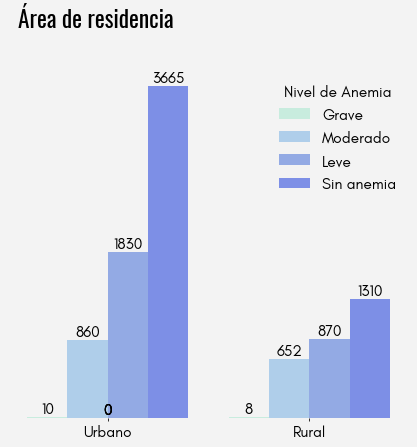

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(8, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='área_residencia', hue='nivel_anemia', palette=palette)

title_t = 'Área de residencia'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según área de residencia'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['Urbano', 'Rural'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['Grave', 'Moderado', 'Leve', 'Sin anemia']
ax.legend(handles, labels, title='Nivel de Anemia', title_fontsize=16, fontsize=16, frameon=False)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

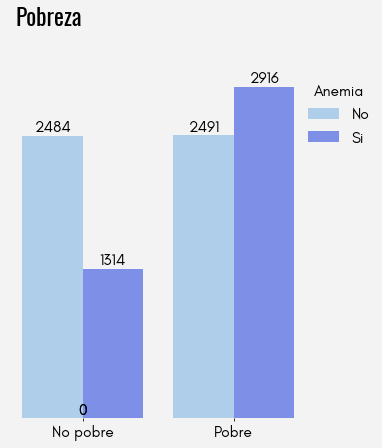

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='pobreza', hue='anemia', palette=palette)

title_t = 'Pobreza'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según pobreza'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['No pobre', 'Pobre'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

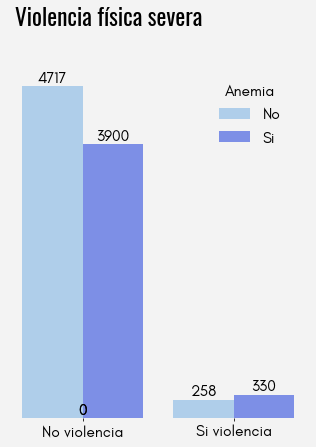

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='violencia_física_severa', hue='anemia', palette=palette)

title_t = 'Violencia física severa'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según violencia física severa'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['No violencia', 'Si violencia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

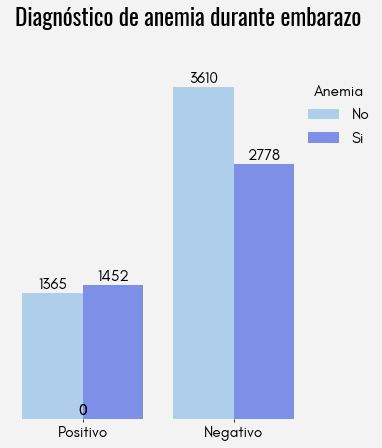

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='durante_embarazo_diagnóstico_anemia', hue='anemia', palette=palette)

title_t = 'Diagnóstico de anemia durante embarazo'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según diagnóstico de anemia durante embarazo'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['Positivo', 'Negativo'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

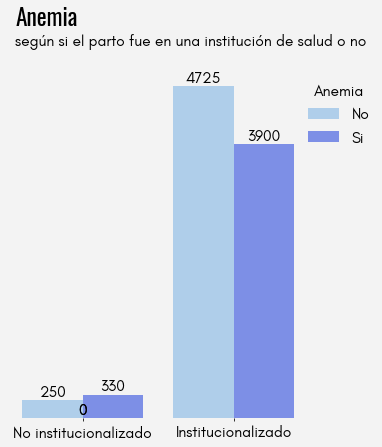

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='parto_institución_salud', hue='anemia', palette=palette)

title_t = 'Anemia'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según si el parto fue en una institución de salud o no'
plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['No institucionalizado', 'Institucionalizado'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

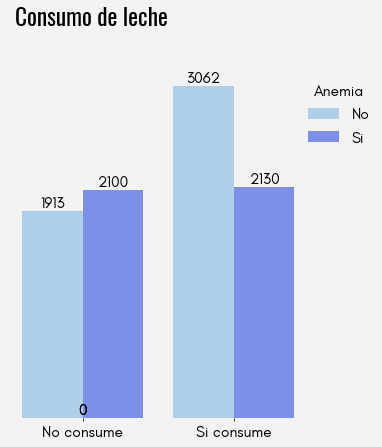

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='consumo_leche', hue='anemia', palette=palette)

title_t = 'Consumo de leche'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según consumo de leche'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['No consume', 'Si consume'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

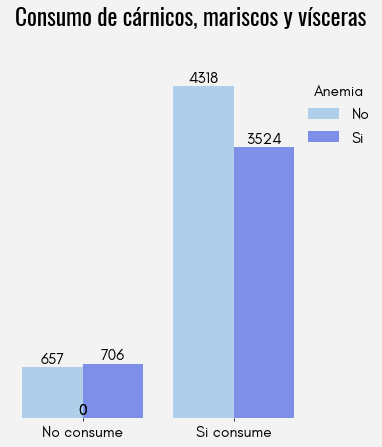

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='res_pollo_pescado_mariscos_otrascarnes_hígado_mondongo_otrasvísceras', hue='anemia', palette=palette)

title_t = 'Consumo de cárnicos, mariscos y vísceras'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según consumo de cárnicos, mariscos y vísceras'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['No consume', 'Si consume'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

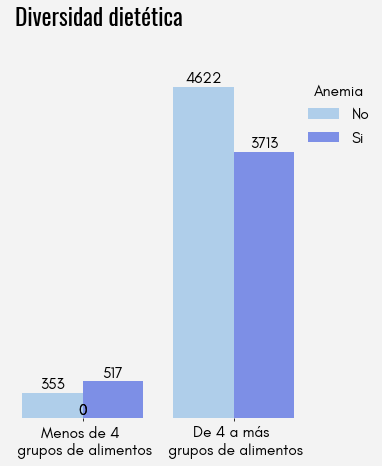

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(6, 7), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.countplot(data=df, x='diversidad_dietética2', hue='anemia', palette=palette)

title_t = 'Diversidad dietética'
plt.suptitle(title_t, x=0.20, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según diversidad dietética'
#plt.title(subtitle_t, loc='left', x=0.20, y=0.87, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])

ax.set_xticks([0, 1])
ax.set_xticklabels(['Menos de 4 \n grupos de alimentos', 'De 4 a más \n grupos de alimentos'], rotation=0, ha='center', fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha="center", va='bottom', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show();

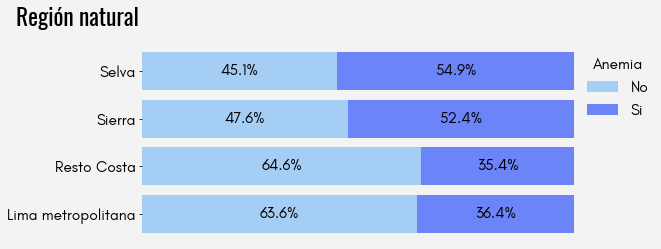

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='región_natural', columns='anemia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Región natural'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según región natural'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['Lima metropolitana', 'Resto Costa', 'Sierra', 'Selva'], fontsize=16, fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

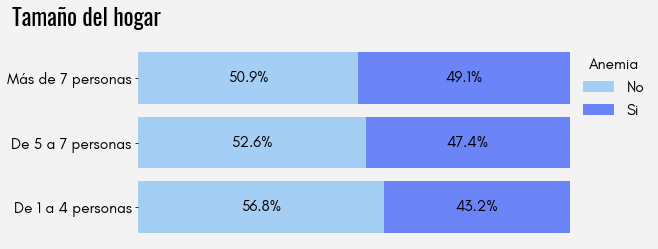

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='tamaño_hogar', columns='anemia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Tamaño del hogar'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según el tamaño del hogar'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['De 1 a 4 personas', 'De 5 a 7 personas', 'Más de 7 personas'], fontsize=16, fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

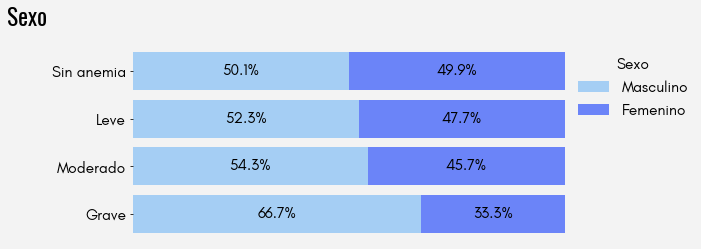

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='nivel_anemia', columns='sexo_niños', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Sexo'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según nivel de anemia'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], fontsize=16, fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['Masculino', 'Femenino']
ax.legend(handles, labels, title='Sexo', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

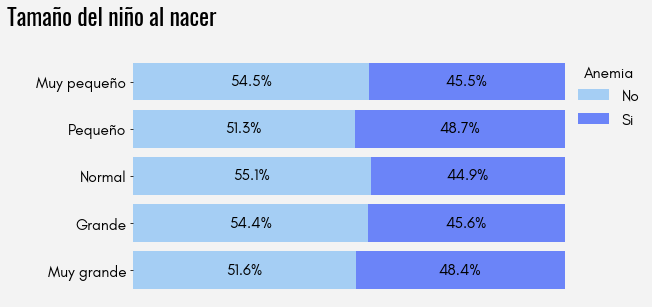

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 5), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='tamaño_niño_al_nacer', columns='anemia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Tamaño del niño al nacer'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según tamaño del niño al nacer'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['Muy grande', 'Grande', 'Normal', 'Pequeño', 'Muy pequeño'], fontsize=16, fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

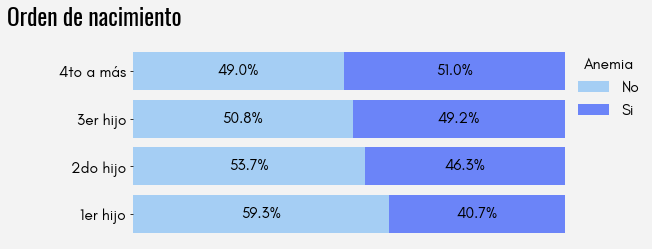

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='orden_nacimiento', columns='anemia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Orden de nacimiento'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según orden de nacimiento del niño'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['1er hijo', '2do hijo', '3er hijo', '4to a más'], fontsize=16, fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

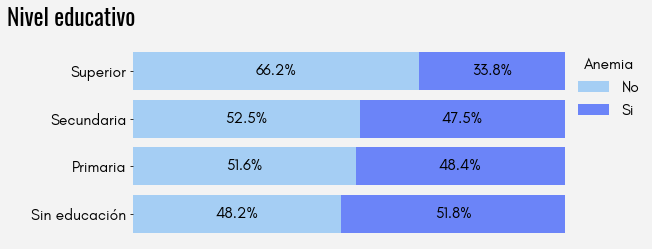

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='nivel_educativo_madre', columns='anemia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Nivel educativo'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según nivel educativo de la madre'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['Sin educación', 'Primaria', 'Secundaria', 'Superior'], fontsize=16, fontfamily='Glacial Indifference')

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

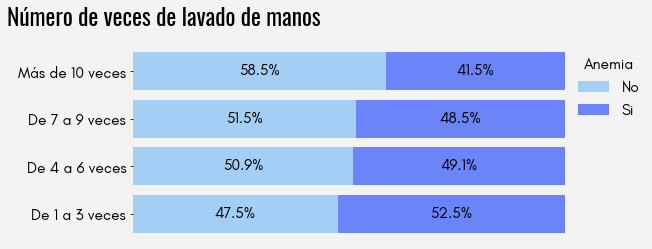

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='n_veces_lavado_manos', columns='anemia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Número de veces de lavado de manos'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según número de veces de lavado de manos'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['De 1 a 3 veces', 'De 4 a 6 veces', 'De 7 a 9 veces', 'Más de 10 veces'])

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Si']
ax.legend(handles, labels, title='Anemia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

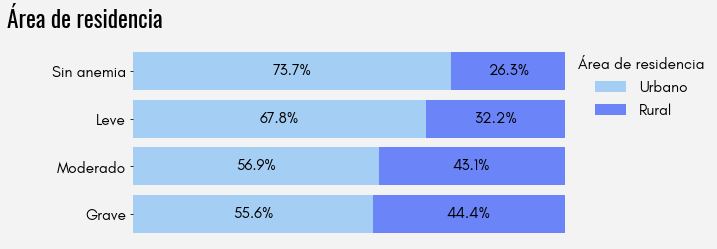

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(9, 4), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

df_pivot = df.pivot_table(index='nivel_anemia', columns='área_residencia', aggfunc='size', fill_value=0)

df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

bottom = np.zeros(len(df_pivot_percentage))
for level, color in zip(df_pivot_percentage.columns, palette):
    ax.barh(df_pivot_percentage.index, df_pivot_percentage[level], left=bottom, label=level, color=color)
    bottom += df_pivot_percentage[level]

title_t = 'Área de residencia'
plt.suptitle(title_t, x=-0.02, y=0.95, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

#subtitle_t = 'según nivel de anemia'
#plt.title(subtitle_t, loc='left', x=-0.02, y=0.83, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])

ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'])

handles, labels = ax.get_legend_handles_labels()
labels = ['Urbano', 'Rural']
ax.legend(handles, labels, title='Área de residencia', title_fontsize=16, fontsize=16, frameon=False, bbox_to_anchor=(0.95, 1), loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=16, color='black', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

# Continuas

<ipython-input-27-e2e0ea630485>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='puntuación_índice_riqueza', palette=palette)


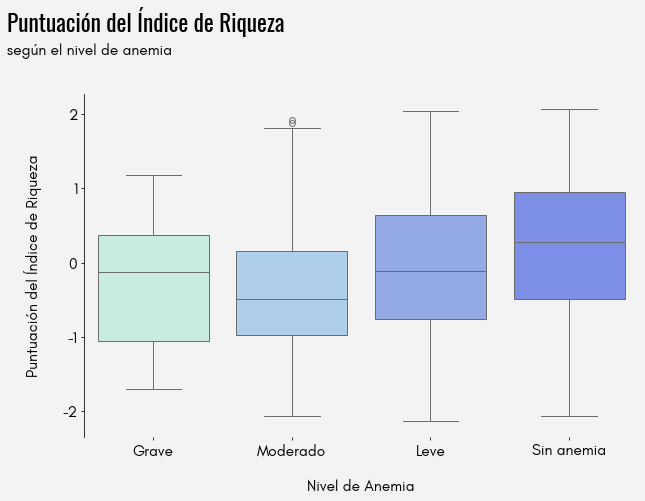

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='puntuación_índice_riqueza', palette=palette)

title_t = 'Puntuación del Índice de Riqueza'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.9, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Puntuación del Índice de Riqueza', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-28-ad4c2746803c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='n_personas_hogar', palette=palette)


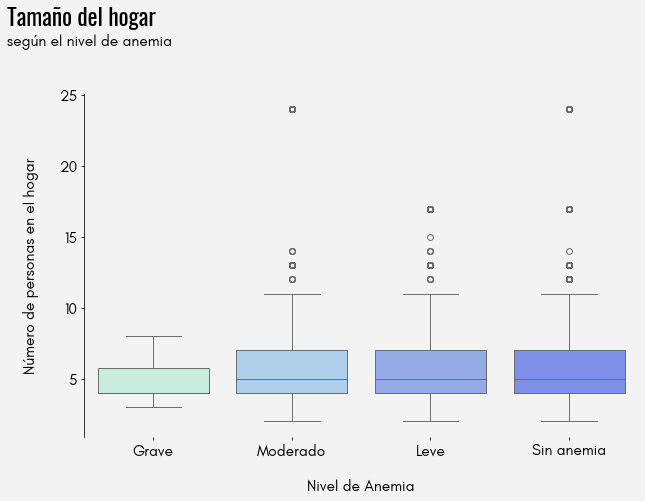

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='n_personas_hogar', palette=palette)

title_t = 'Tamaño del hogar'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Número de personas en el hogar', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-29-28d8698d4243>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='edad_meses', palette=palette)


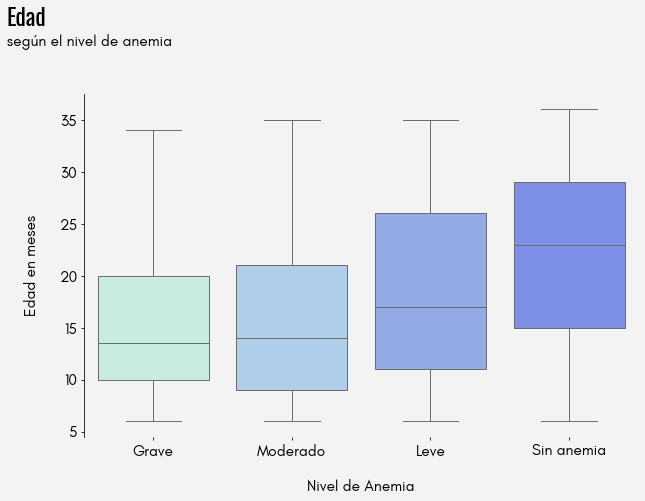

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='edad_meses', palette=palette)

title_t = 'Edad'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Edad en meses', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-30-994fc6110fd8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='peso_kg', palette=palette)


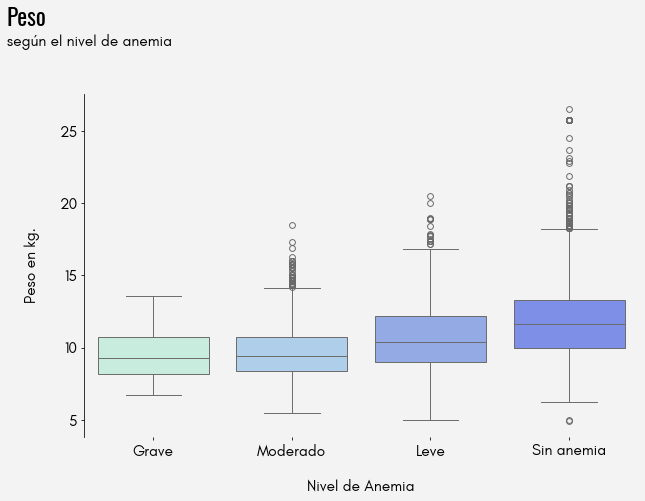

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='peso_kg', palette=palette)

title_t = 'Peso'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Peso en kg.', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-31-dfe79939453d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='talla_cm', palette=palette)


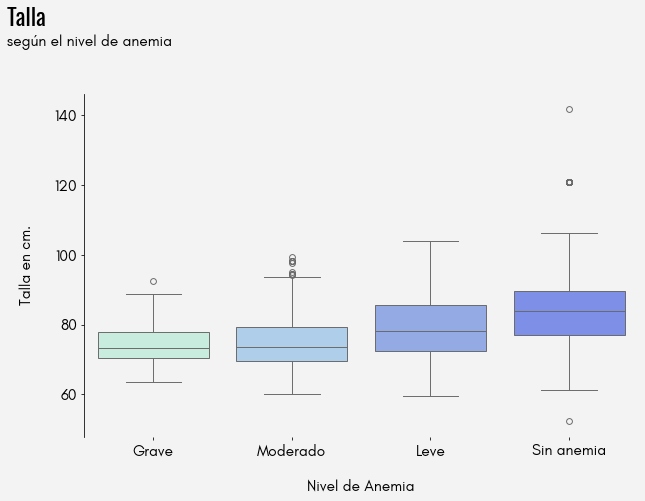

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='talla_cm', palette=palette)

title_t = 'Talla'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Talla en cm.', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-32-bb778afed108>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='n_orden_nacimiento', palette=palette)


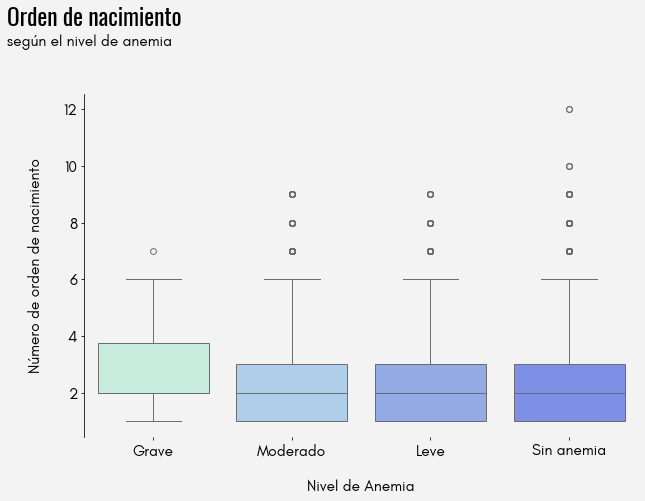

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='n_orden_nacimiento', palette=palette)

title_t = 'Orden de nacimiento'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Número de orden de nacimiento', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-33-37557fa42d71>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='edad_madre', palette=palette)


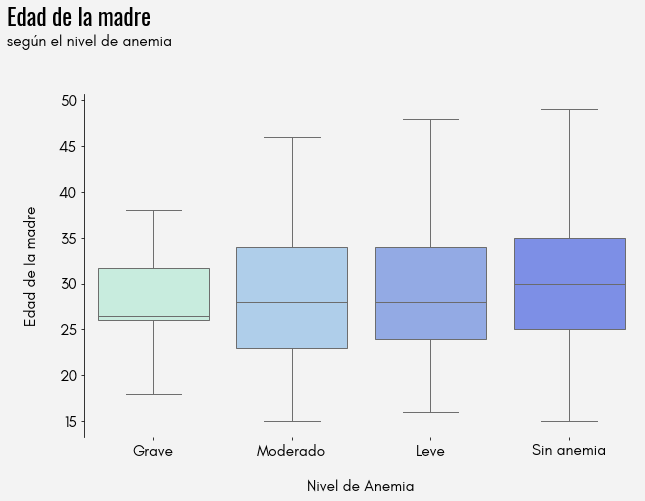

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='edad_madre', palette=palette)

title_t = 'Edad de la madre'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Edad de la madre', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-34-a71b185c8b09>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='diversidad_dietética', palette=palette)


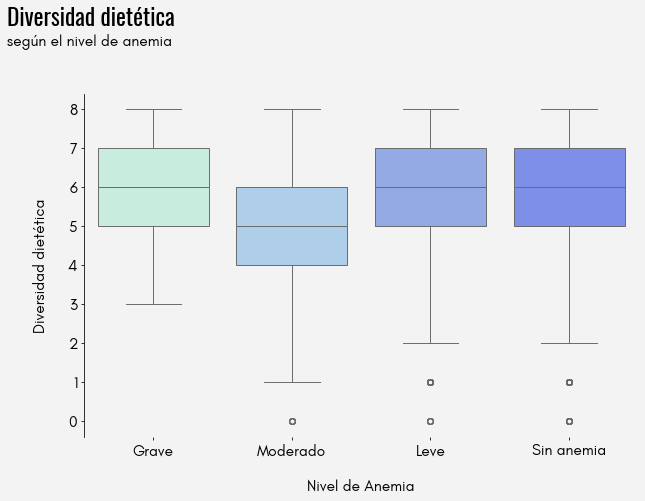

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='diversidad_dietética', palette=palette)

title_t = 'Diversidad dietética'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Diversidad dietética', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-35-33509a594f6e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='nivel_anemia', y='n_meses_lactancia', palette=palette)


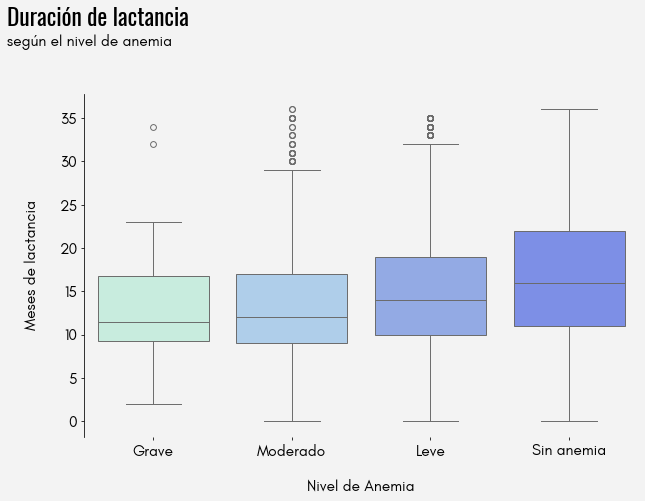

In [ ]:
palette = ['#C2F2DF', '#A5CEF4', '#85A5F1', '#6B84F8']

fig, ax = plt.subplots(figsize=(11, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='nivel_anemia', y='n_meses_lactancia', palette=palette)

title_t = 'Duración de lactancia'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según el nivel de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Nivel de Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Meses de lactancia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grave', 'Moderado', 'Leve', 'Sin anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-36-8b2cd15ad0e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='puntuación_índice_riqueza', palette=palette)


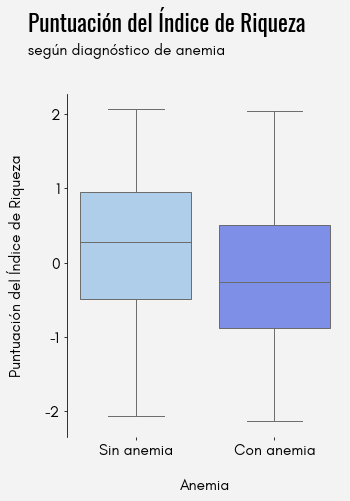

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='puntuación_índice_riqueza', palette=palette)

title_t = 'Puntuación del Índice de Riqueza'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.9, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Puntuación del Índice de Riqueza', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-37-f6f1f8647abe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='n_personas_hogar', palette=palette)


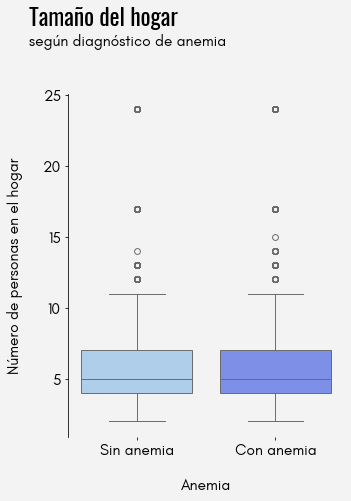

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='n_personas_hogar', palette=palette)

title_t = 'Tamaño del hogar'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Número de personas en el hogar', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-38-c4f39e4d4f4c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='edad_meses', palette=palette)


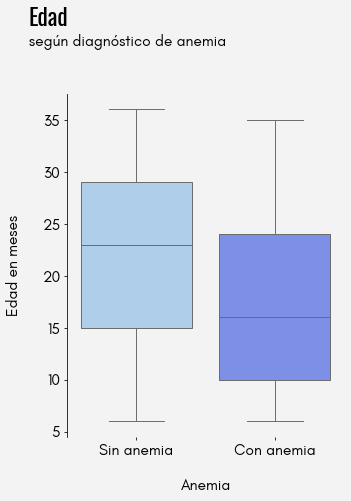

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='edad_meses', palette=palette)

title_t = 'Edad'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Edad en meses', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-39-c0d1ba3a3a7a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='peso_kg', palette=palette)


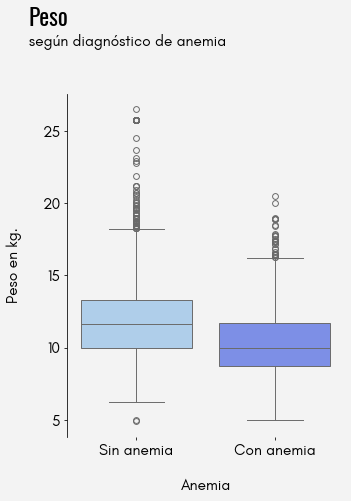

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='peso_kg', palette=palette)

title_t = 'Peso'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Peso en kg.', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-40-2fef0fdd800e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='talla_cm', palette=palette)


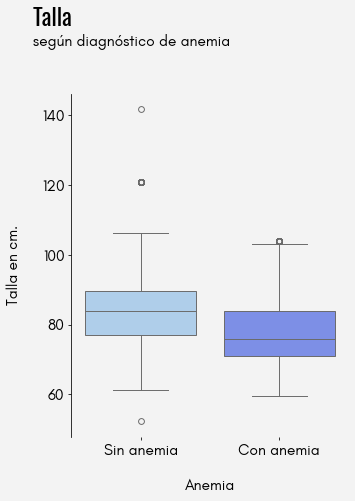

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='talla_cm', palette=palette)

title_t = 'Talla'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Talla en cm.', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-41-feb6f69d3140>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='n_orden_nacimiento', palette=palette)


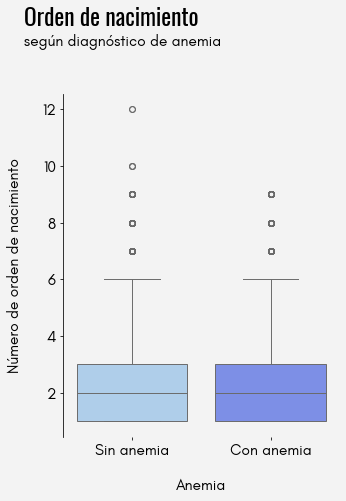

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='n_orden_nacimiento', palette=palette)

title_t = 'Orden de nacimiento'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Número de orden de nacimiento', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-42-b03491c28afe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='edad_madre', palette=palette)


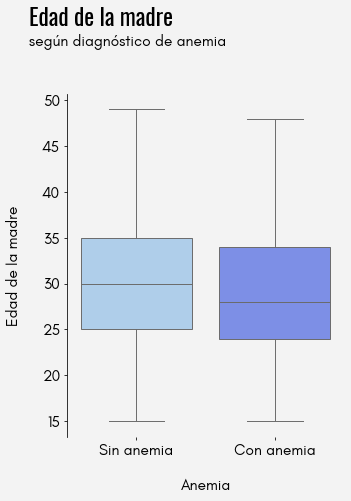

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='edad_madre', palette=palette)

title_t = 'Edad de la madre'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Edad de la madre', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-43-b8ca2f5d86e8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='diversidad_dietética', palette=palette)


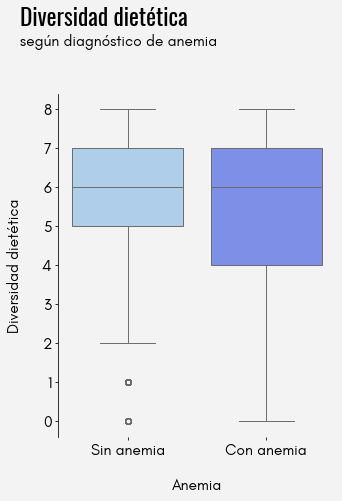

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='diversidad_dietética', palette=palette)

title_t = 'Diversidad dietética'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Diversidad dietética', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()

<ipython-input-44-af902f2310cd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='anemia', y='n_meses_lactancia', palette=palette)


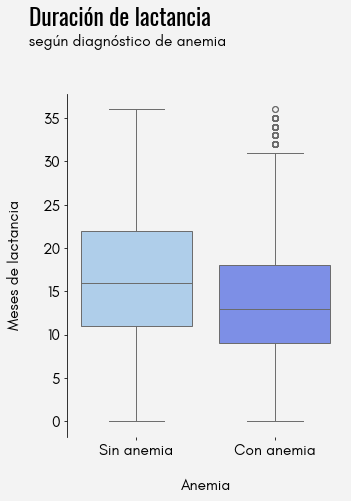

In [ ]:
palette = ['#A5CEF4', '#6B84F8']

fig, ax = plt.subplots(figsize=(5.5, 6.9), dpi=70)
fig.patch.set_facecolor('#F3F3F3')
ax.set_facecolor('#F3F3F3')

ax = sns.boxplot(data=df, x='anemia', y='n_meses_lactancia', palette=palette)

title_t = 'Duración de lactancia'
plt.suptitle(title_t, x=0.08, y=1, ha='left', transform=plt.gcf().transFigure, fontsize=24, fontweight='bold', fontfamily='Oswald')

subtitle_t = 'según diagnóstico de anemia'
plt.title(subtitle_t, loc='left', x=0.08, y=0.92, transform=plt.gcf().transFigure, fontsize=16, fontweight='regular', fontfamily='Glacial Indifference')

plt.xlabel('Anemia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)
plt.ylabel('Meses de lactancia', fontsize=16, fontweight='regular', fontfamily='Glacial Indifference', labelpad=20)

ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin anemia', 'Con anemia'], rotation=0, ha='center', fontfamily='Glacial Indifference')

plt.subplots_adjust(top=0.82, left=0.18)

plt.show()